In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity


#test discovering states based on a sample observation
#generate new signal
time = np.linspace(0, 50, 1000)

s0 = 5*np.sin(40*time)
s1 = 5*np.sin(time)
s2 = 5*np.sin(10*time)

s = np.r_[s2, s1, s0, s1]


In [68]:
def kde_sklearn(sig, x_samples, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(sig[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_samples[:, np.newaxis])
    return np.exp(log_pdf)


In [7]:
def plotwithhist(t, s, bins=50):
    data = {"t":t, "s":s}
    g = sns.JointGrid(x="t", y="s", data=data)
    sns.lineplot(t,s, ax=g.ax_joint)
    sns.distplot(s, bins=bins, kde=True, vertical=True, ax=g.ax_marg_y)
    

In [30]:
def dispHist(n, bins):
    h = max(n)-min(n)
    b = max(bins)-min(bins)

    return h, b

def Window_dist(s, fs, window_len=50, window='hanning'):
    output1 = np.zeros(len(s))
    output2 = np.zeros(len(s))
    win = eval('np.' + window + '(window_len)')

    if s.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if s.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len < 3:
        return s

    WinRange = int(window_len/2)

    sig = np.r_[s[WinRange:0:-1], s, s[-1:len(s)-WinRange:-1]]
    
    for i in range(int(WinRange), len(sig) - int(WinRange)):
        n, bins = np.histogram(sig[i - WinRange:WinRange + i])
        h, b = dispHist(n, bins)
        output1[i - WinRange] = h
        output2[i - WinRange] = b
    
    return output1, output2

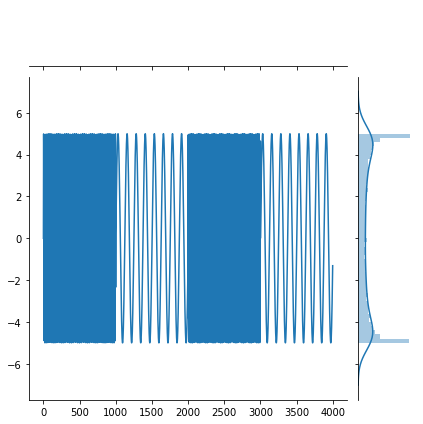

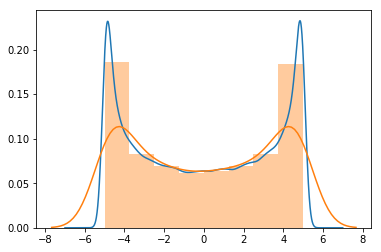

In [77]:
plotwithhist(np.linspace(0,len(s),len(s)), s)

plt.figure()
# plt.plot(x, pdf)
sns.distplot(s1)

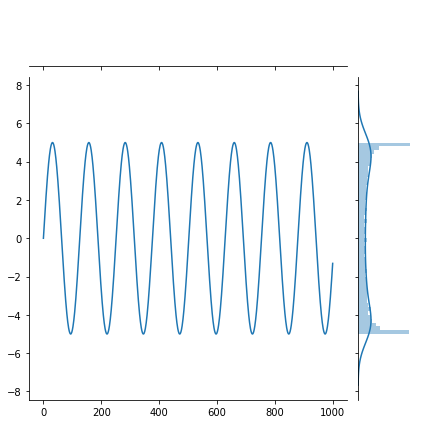

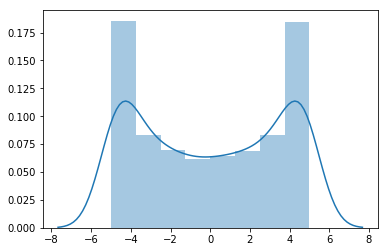

In [9]:
plotwithhist(np.linspace(0,len(s1),len(s1)), s1)
plt.figure()
sns.distplot(s1, norm_hist=False)

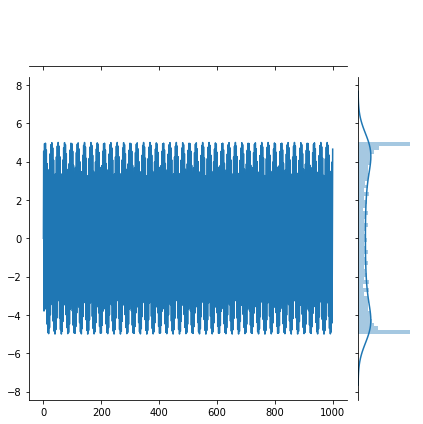

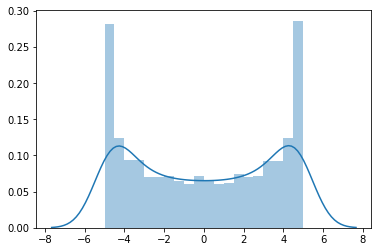

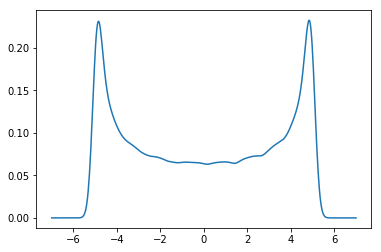

In [80]:
plotwithhist(np.linspace(0,len(s0),len(s0)), s0)
plt.figure()
sns.distplot(s0, bins=20, norm_hist=False)
plt.figure()


In [81]:
#test discovering states based on a sample observation
#generate new signal
lgth = 100

noise = np.random.normal(0, 1, lgth)

s0 = 10*noise*np.ones(lgth)
s1 = noise*np.ones(lgth)

s = np.r_[s0, s1, s0]

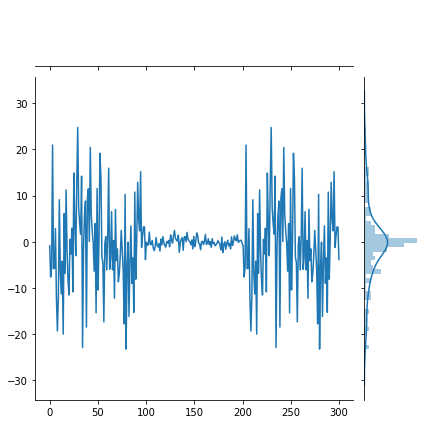

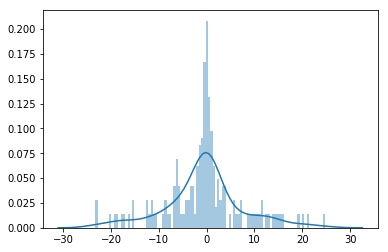

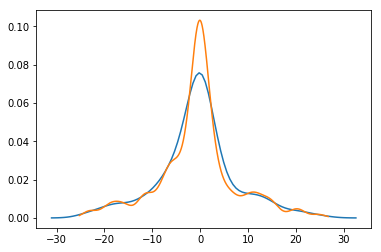

In [96]:
plotwithhist(np.linspace(0,len(s),len(s)), s)
plt.figure()
ax1 = sns.distplot(s, bins=100, norm_hist=False)
fit = ax1.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
plt.figure()
# plt.hist(s, bins=100)
x = np.linspace(min(s)-2, max(s)+2, 10000)
pdf = kde_sklearn(s, x, bandwidth=1.5)
plt.plot(xfit, yfit)
plt.plot(x, pdf)

(array([ 9.,  7., 12., 12., 23., 13., 12.,  4.,  7.,  1.]),
 array([-1.88320443, -1.42430505, -0.96540567, -0.5065063 , -0.04760692,
         0.41129246,  0.87019184,  1.32909121,  1.78799059,  2.24688997,
         2.70578934]),
 <a list of 10 Patch objects>)

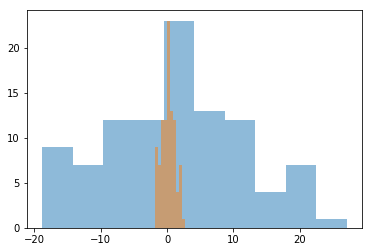

In [62]:
plt.hist(s0, bins=len(s0)//10, alpha=0.5, label='x', cumulative=False)
plt.hist(s1, bins=len(s1)//10, alpha=0.5, label='y', cumulative=False)

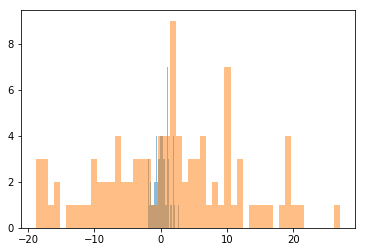

In [63]:
n1, bins1, patches = plt.hist(s1, bins=50, alpha=0.5, label='y', cumulative=False)
n2, bins2, patches = plt.hist(s0, bins=50, alpha=0.5, label='x', cumulative=False)

In [37]:
o1, o2 = Window_dist(s, fs=1, window_len=25)

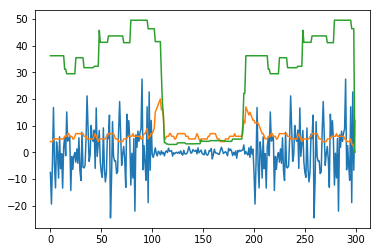

In [38]:
plt.plot(s)
plt.plot(o1)
plt.plot(o2)

In [54]:
#test discovering states based on a sample observation
#generate new signal
time = np.linspace(0, 50, 1000)



s0 = 5*np.sin(40*time)
s1 = 5*np.sin(time)
s2 = 10*np.sin(10*time)

s = np.r_[s2, s1, s0, s1]

In [55]:
o1, o2 = Window_dist(s, fs=1, window_len=len(s)//100)

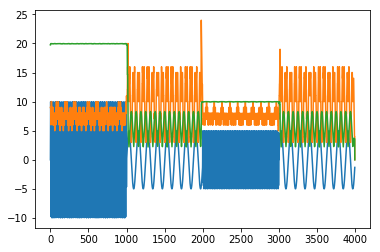

In [56]:
plt.plot(s)
plt.plot(o1)
plt.plot(o2)